In [61]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import astropy.io.fits as pyfits
import astropy.utils as autils
import requests
import json
import datetime
from pprint import pprint as pp
import os
import astropy.io.fits as fits

# Jielai added modules f
import subprocess
import seaborn as sns
pw = 'XXX'
usrname = 'XXX'

# Time Counter function
import time
def tic():
    tic.start = time.perf_counter()
def toc():
    elapsed_seconds = time.perf_counter() - tic.start
    return elapsed_seconds # fractional

# NOAO server Settings
natroot = 'https://astroarchive.noirlab.edu'
assert natroot == 'https://astroarchive.noirlab.edu', 'Notebook does NOT point to PRODUCTION'
print(f"Using server on {natroot}")
adsurl = f'{natroot}/api/adv_search'
print(f"adsurl = {adsurl}")

# Start the timer
print(f'Started on: {str(datetime.datetime.now())}')
tic() # Start timing the run of this notebook

Using server on https://astroarchive.noirlab.edu
adsurl = https://astroarchive.noirlab.edu/api/adv_search
Started on: 2022-01-24 21:31:20.645421


In [50]:
jj = {
    "outfields" : [
        "md5sum",
        "archive_filename",
        #"telescope",
        #"instrument",
        #"obs_type",
        "proc_type",
        "prod_type",
        #"release_date",
        "proposal",
        "ra_center",
        #"ra_min",
        "dec_center",
        #"dec_min",
        # 'The local calendar date of the telescope, at the start of PM observing.' = caldat
        "caldat",
        "url",
        "filesize",
        "ifilter",
        #"seeing",
        "exposure",
        #"depth",
        "dateobs_min",
        "dateobs_max",
        'release_date'
    ],
    "search" : [
        #["release_date", "2020-01-01", "2021-01-01"], # proprietary
        ["obs_type", 'object'],
        #["pi", 'cooke'],
        ["proposal","2019A-0911","2019B-1012"],
        ["proc_type","instcal"],
        ["prod_type", "image"],
        ["caldat","2019-01-01", "2019-12-31"]
    ]
}
apiurl = f'{adsurl}/fasearch/?limit=200000'
print(f'Using API url: {apiurl}')
ads_df = pd.DataFrame(requests.post(apiurl,json=jj).json()[1:])
print(len(ads_df))
#ads_df

Using API url: https://astroarchive.noirlab.edu/api/adv_search/fasearch/?limit=200000
2893


Text(0.5, 1.0, 'all fields observed during DWF run 2021 June')

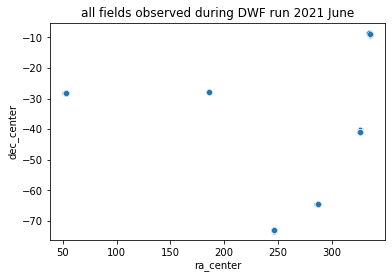

In [51]:
sns.scatterplot(data=ads_df, x="ra_center", y="dec_center")
plt.title("all fields observed during DWF run 2021 June")

In [66]:
ads_df.iloc[0]

md5sum                               0014d6093f6cdc63baccd377fc566025
archive_filename    /net/archive/pipe/20190627/ct4m/2019A-0911/c4d...
proc_type                                                     instcal
prod_type                                                       image
proposal                                                   2019A-0911
ra_center                                                     246.494
dec_center                                                   -73.0006
caldat                                                     2019-06-27
filesize                                                    323248320
ifilter                              g DECam SDSS c0001 4720.0 1520.0
exposure                                                           20
release_date                                               2020-12-18
dateobs_min                               2019-06-28T00:24:56.958899Z
dateobs_max                               2019-06-28T00:25:16.958899Z
url                 

[246.4505, -72.202194] NGC6101
[287.442079, -63.85753] NGC6744
[326, -41] Field3
[335, -9] FRB171019
[186.5, -28] Antlia
[52.5, -28] CDFS


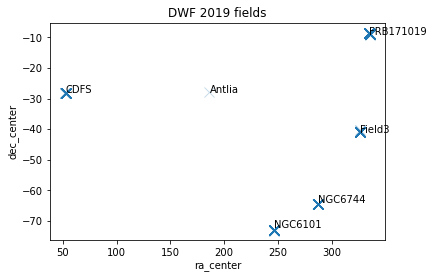

In [64]:
sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.1, marker='x',s=100)
plt.title("DWF 2019 fields")
# there are 15 fields focusing on GRB210605A, which is correct 
# we defined 15 fields, but 2 were not observed even once
dic_fieldname_coordinates = {
    'NGC6101' : [246.4505, -72.202194],
    'NGC6744' : [287.442079, -63.85753],
    'Field3' : [326, -41],
    'FRB171019' : [335, -9],
    'Unknown9hr' : [186.5,-28], 
    'CDFS' : [52.5,-28],
}

for n,c in dic_fieldname_coordinates.items():
    print(c,n)
    plt.annotate(n, (c[0], c[1]))


 [246.4505, -72.202194] NGC6101
670
md5sum                               0014d6093f6cdc63baccd377fc566025
archive_filename    /net/archive/pipe/20190627/ct4m/2019A-0911/c4d...
proc_type                                                     instcal
prod_type                                                       image
proposal                                                   2019A-0911
ra_center                                                     246.494
dec_center                                                   -73.0006
caldat                                                     2019-06-27
filesize                                                    323248320
ifilter                              g DECam SDSS c0001 4720.0 1520.0
exposure                                                           20
release_date                                               2020-12-18
dateobs_min                               2019-06-28T00:24:56.958899Z
dateobs_max                               2019-06-28T

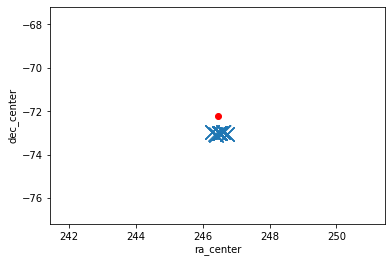

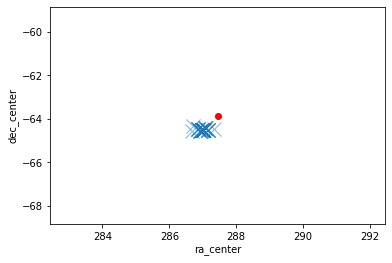

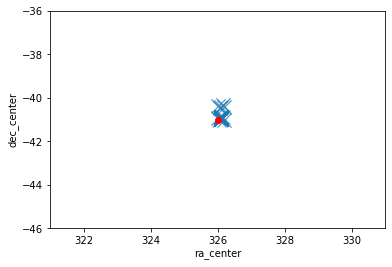

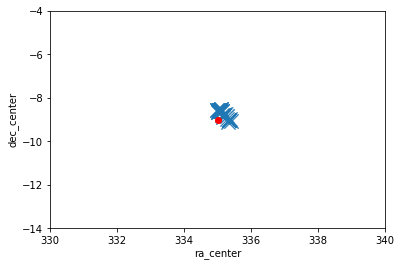

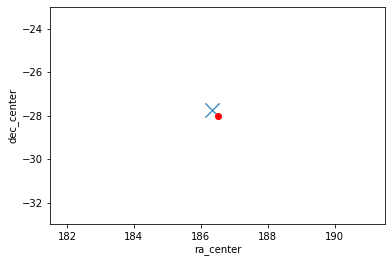

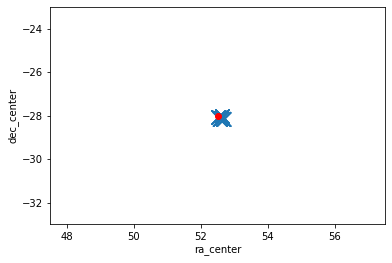

In [69]:
for n,c in dic_fieldname_coordinates.items():
    print('\n',c,n)
    field_RA   =  c[0]
    field_DEC  = c[1]
    dec_offset_allowance = 5
    RA_offset_allowance  = 5
    ra_min = field_RA-RA_offset_allowance
    ra_max = field_RA+RA_offset_allowance
    dec_min = field_DEC-dec_offset_allowance
    dec_max = field_DEC+dec_offset_allowance
    field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                            (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                         )]
    print(len(field_ads_df))

    plt.figure()
    sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
    plt.ylim(dec_min, dec_max)
    plt.xlim(ra_min, ra_max)
    plt.scatter(field_RA,field_DEC,color='red')
    print(field_ads_df.iloc[0])
    print(field_ads_df.iloc[0]['url'])
    cal_dates = field_ads_df['caldat']
    print(set(cal_dates))
    
    #os.system(f"wget {field_ads_df.iloc[0]['url']} --output-document=/Users/jielaizhang/Downloads/{n}.fits")
    
    h = fits.getheader(f"/Users/jielaizhang/Downloads/{n}.fits")
    print(h['OBJECT'])


 [186.5, -28] Antlia
3
md5sum                               836bff15e30053e4fe155cd70e3efb73
archive_filename    /net/archive/pipe/20190627/ct4m/2019A-0911/c4d...
proc_type                                                     instcal
prod_type                                                       image
proposal                                                   2019A-0911
ra_center                                                     186.325
dec_center                                                   -27.7499
caldat                                                     2019-06-27
filesize                                                    321710400
ifilter                              r DECam SDSS c0002 6415.0 1480.0
exposure                                                           30
release_date                                               2020-12-18
dateobs_min                               2019-06-27T22:42:37.292621Z
dateobs_max                               2019-06-27T22:43:07.2926

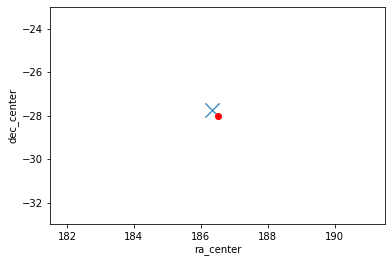

In [68]:
for n,c in dic_fieldname_coordinates.items():
    if n=='Antlia' :

        print('\n',c,n)
        field_RA   =  c[0]
        field_DEC  = c[1]
        dec_offset_allowance = 5
        RA_offset_allowance  = 5
        ra_min = field_RA-RA_offset_allowance
        ra_max = field_RA+RA_offset_allowance
        dec_min = field_DEC-dec_offset_allowance
        dec_max = field_DEC+dec_offset_allowance
        field_ads_df = ads_df[( (ads_df['ra_center']>ra_min) & (ads_df['ra_center']<ra_max) &
                                (ads_df['dec_center']<dec_max) & (ads_df['dec_center']>dec_min)
                             )]
        print(len(field_ads_df))

        plt.figure()
        sns.scatterplot(data=ads_df, x="ra_center", y="dec_center", alpha=0.5, marker='x',s=200)
        plt.ylim(dec_min, dec_max)
        plt.xlim(ra_min, ra_max)
        plt.scatter(field_RA,field_DEC,color='red')
        print(field_ads_df.iloc[1])
        print(field_ads_df.iloc[1]['url'])

        os.system(f"wget {field_ads_df.iloc[0]['url']} --output-document=/Users/jielaizhang/Downloads/{n}1.fits")

        h = fits.getheader(f"/Users/jielaizhang/Downloads/{n}1.fits")
        print(h['OBJECT'])